In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("kamilpytlak/personal-key-indicators-of-heart-disease")

print("Path to dataset files:", path)

Path to dataset files: /Users/jackiewang/.cache/kagglehub/datasets/kamilpytlak/personal-key-indicators-of-heart-disease/versions/6


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wr
wr.filterwarnings('ignore')
import os

# List files in the downloaded directory
print("Files in directory:", os.listdir(path))

# Load the CSV file (adjust filename if different)
csv_file = os.path.join(path, '2022', 'heart_2022_no_nans.csv')
df = pd.read_csv(csv_file)

# Check the shape
print("Dataset shape:", df.shape)
print("Rows:", df.shape[0])
print("Columns:", df.shape[1])

Files in directory: ['2022', '2020']
Dataset shape: (246022, 40)
Rows: 246022
Columns: 40
Dataset shape: (246022, 40)
Rows: 246022
Columns: 40


In [5]:
print(df.head())

     State     Sex GeneralHealth  PhysicalHealthDays  MentalHealthDays  \
0  Alabama  Female     Very good                 4.0               0.0   
1  Alabama    Male     Very good                 0.0               0.0   
2  Alabama    Male     Very good                 0.0               0.0   
3  Alabama  Female          Fair                 5.0               0.0   
4  Alabama  Female          Good                 3.0              15.0   

                                     LastCheckupTime PhysicalActivities  \
0  Within past year (anytime less than 12 months ...                Yes   
1  Within past year (anytime less than 12 months ...                Yes   
2  Within past year (anytime less than 12 months ...                 No   
3  Within past year (anytime less than 12 months ...                Yes   
4  Within past year (anytime less than 12 months ...                Yes   

   SleepHours            RemovedTeeth HadHeartAttack  ... HeightInMeters  \
0         9.0            Non

In [26]:
df.columns

Index(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
       'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
       'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
       'HighRiskLastYear', 'CovidPos'],
      dtype='object')

EDA: Exploratory Data Analysis

In [28]:
# Summary statistics for numerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PhysicalHealthDays,246022.0,4.119026,8.405844,0.00,0.00,0.00,3.00,30.00
MentalHealthDays,246022.0,4.167140,8.102687,0.00,0.00,0.00,4.00,30.00
SleepHours,246022.0,7.021331,1.440681,1.00,6.00,7.00,8.00,24.00
HeightInMeters,246022.0,1.705150,0.106654,0.91,1.63,1.70,1.78,2.41
WeightInKilograms,246022.0,83.615179,21.323156,28.12,68.04,81.65,95.25,292.57
BMI,246022.0,28.668136,6.513973,12.02,24.27,27.46,31.89,97.65


PhysicalHealth - how many days in a month did you feel poor physical health.

MentalHealth - how many days in a month did you feel poor mental health.


## Research Question EDA

Question 1 (Hypothesis Driven): Do individuals with diabetes, stroke history, or poor general health have higher odds of having had a heart attack, after accounting for basic demographic factors?

Question 2 (Data Driven): Can we accurately predict whether an individual has had a heart attack based on lifestyle behaviors and existing chronic health conditions?


Heart Attack Distribution:
HadHeartAttack
No     232587
Yes     13435
Name: count, dtype: int64

Percentage distribution:
HadHeartAttack
No     94.539106
Yes     5.460894
Name: proportion, dtype: float64


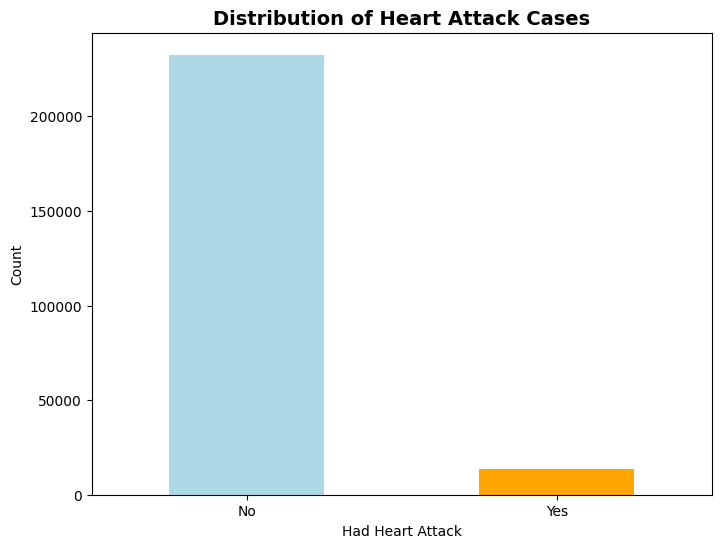

In [ ]:
print("Heart Attack Distribution:")
print(df['HadHeartAttack'].value_counts())
print(f"\nPercentage distribution:")
print(df['HadHeartAttack'].value_counts(normalize=True) * 100)

# Create a more readable plot
plt.figure(figsize=(8, 6))
df['HadHeartAttack'].value_counts().plot(kind='bar', color=['lightblue', 'orange'])
plt.title('Distribution of Heart Attack Cases', fontsize=14, fontweight='bold')
plt.xlabel('Had Heart Attack')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [67]:
# Diabetes, Stroke, General Health vs Heart Attack
key_vars_q1 = ['HadDiabetes', 'HadStroke', 'GeneralHealth', 'AgeCategory', 'Sex', 'BMI']

print("\n1. Diabetes vs Heart Attack:")
crosstab_diabetes = pd.crosstab(df['HadDiabetes'], df['HadHeartAttack'], normalize='index') * 100
print(crosstab_diabetes)

print("\n2. Stroke vs Heart Attack:")
crosstab_stroke = pd.crosstab(df['HadStroke'], df['HadHeartAttack'], normalize='index') * 100
print(crosstab_stroke)

print("\n3. General Health vs Heart Attack:")
crosstab_health = pd.crosstab(df['GeneralHealth'], df['HadHeartAttack'], normalize='index') * 100
print(crosstab_health)


1. Diabetes vs Heart Attack:
HadHeartAttack                                  No        Yes
HadDiabetes                                                  
No                                       95.931828   4.068172
No, pre-diabetes or borderline diabetes  92.729970   7.270030
Yes                                      86.236063  13.763937
Yes, but only during pregnancy (female)  97.175996   2.824004

2. Stroke vs Heart Attack:
HadHeartAttack         No        Yes
HadStroke                           
No              95.372388   4.627612
Yes             75.098892  24.901108

3. General Health vs Heart Attack:
HadHeartAttack         No        Yes
GeneralHealth                       
Excellent       98.569536   1.430464
Fair            87.775205  12.224795
Good            94.058830   5.941170
Poor            78.536585  21.463415
Very good       97.160887   2.839113


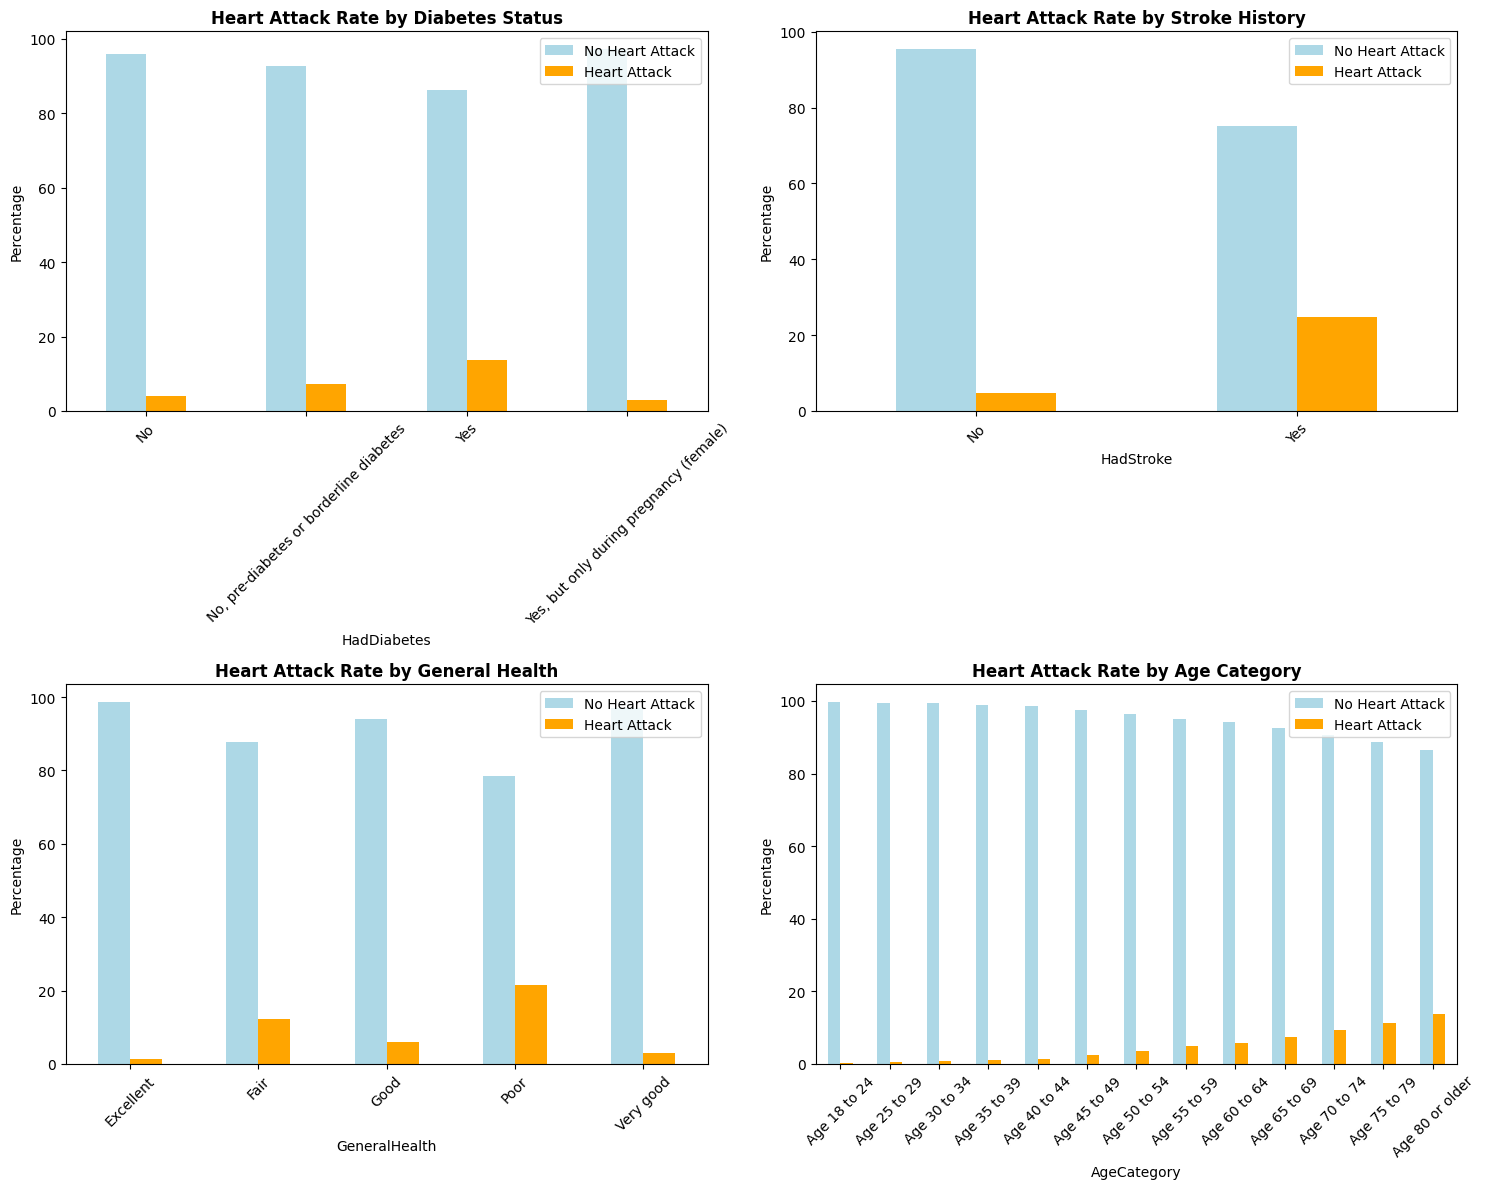

In [68]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Diabetes vs Heart Attack
ax1 = axes[0, 0]
diabetes_ha = pd.crosstab(df['HadDiabetes'], df['HadHeartAttack'], normalize='index') * 100
diabetes_ha.plot(kind='bar', ax=ax1, color=['lightblue', 'orange'])
ax1.set_title('Heart Attack Rate by Diabetes Status', fontweight='bold')
ax1.set_ylabel('Percentage')
ax1.legend(['No Heart Attack', 'Heart Attack'])
ax1.tick_params(axis='x', rotation=45)

# Stroke vs Heart Attack
ax2 = axes[0, 1]
stroke_ha = pd.crosstab(df['HadStroke'], df['HadHeartAttack'], normalize='index') * 100
stroke_ha.plot(kind='bar', ax=ax2, color=['lightblue', 'orange'])
ax2.set_title('Heart Attack Rate by Stroke History', fontweight='bold')
ax2.set_ylabel('Percentage')
ax2.legend(['No Heart Attack', 'Heart Attack'])
ax2.tick_params(axis='x', rotation=45)

# General Health vs Heart Attack
ax3 = axes[1, 0]
health_ha = pd.crosstab(df['GeneralHealth'], df['HadHeartAttack'], normalize='index') * 100
health_ha.plot(kind='bar', ax=ax3, color=['lightblue', 'orange'])
ax3.set_title('Heart Attack Rate by General Health', fontweight='bold')
ax3.set_ylabel('Percentage')
ax3.legend(['No Heart Attack', 'Heart Attack'])
ax3.tick_params(axis='x', rotation=45)

# Age vs Heart Attack
ax4 = axes[1, 1]
age_ha = pd.crosstab(df['AgeCategory'], df['HadHeartAttack'], normalize='index') * 100
age_ha.plot(kind='bar', ax=ax4, color=['lightblue', 'orange'])
ax4.set_title('Heart Attack Rate by Age Category', fontweight='bold')
ax4.set_ylabel('Percentage')
ax4.legend(['No Heart Attack', 'Heart Attack'])
ax4.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### Question 2 EDA: Lifestyle Behaviors and Chronic Conditions

In [69]:
# Lifestyle behaviors and chronic conditions analysis
lifestyle_vars = ['SmokerStatus', 'AlcoholDrinkers', 'PhysicalActivities', 'SleepHours']
chronic_conditions = ['HadDiabetes', 'HadStroke', 'HadAsthma', 'HadKidneyDisease', 
                     'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder', 'HadArthritis']

# Smoking status
print("\n1. Smoking Status vs Heart Attack:")
smoking_ha = pd.crosstab(df['SmokerStatus'], df['HadHeartAttack'], normalize='index') * 100
print(smoking_ha)

# Alcohol consumption
print("\n2. Alcohol Consumption vs Heart Attack:")
alcohol_ha = pd.crosstab(df['AlcoholDrinkers'], df['HadHeartAttack'], normalize='index') * 100
print(alcohol_ha)

# Physical activity
print("\n3. Physical Activity vs Heart Attack:")
activity_ha = pd.crosstab(df['PhysicalActivities'], df['HadHeartAttack'], normalize='index') * 100
print(activity_ha)


1. Smoking Status vs Heart Attack:
HadHeartAttack                                No       Yes
SmokerStatus                                              
Current smoker - now smokes every day  91.684750  8.315250
Current smoker - now smokes some days  93.171997  6.828003
Former smoker                          91.813446  8.186554
Never smoked                           96.296798  3.703202

2. Alcohol Consumption vs Heart Attack:
HadHeartAttack          No       Yes
AlcoholDrinkers                     
No               92.675789  7.324211
Yes              96.063766  3.936234

3. Physical Activity vs Heart Attack:
HadHeartAttack             No       Yes
PhysicalActivities                     
No                  91.004314  8.995686
Yes                 95.549818  4.450182


In [70]:
# Chronic conditions analysis
print("\nChronic Conditions vs Heart Attack:")
chronic_results = {}

for condition in chronic_conditions:
    if condition in df.columns:
        condition_ha = pd.crosstab(df[condition], df['HadHeartAttack'], normalize='index') * 100
        if 'Yes' in condition_ha.index:
            heart_attack_rate = condition_ha.loc['Yes', 'Yes'] if 'Yes' in condition_ha.columns else 0
            chronic_results[condition] = heart_attack_rate
            print(f"\n{condition}:")
            print(condition_ha)

# Summary of heart attack rates by chronic condition
chronic_summary = pd.DataFrame(list(chronic_results.items()), 
                             columns=['Condition', 'Heart_Attack_Rate_%'])
chronic_summary = chronic_summary.sort_values('Heart_Attack_Rate_%', ascending=False)
print(chronic_summary)


Chronic Conditions vs Heart Attack:

HadDiabetes:
HadHeartAttack                                  No        Yes
HadDiabetes                                                  
No                                       95.931828   4.068172
No, pre-diabetes or borderline diabetes  92.729970   7.270030
Yes                                      86.236063  13.763937
Yes, but only during pregnancy (female)  97.175996   2.824004

HadStroke:
HadHeartAttack         No        Yes
HadStroke                           
No              95.372388   4.627612
Yes             75.098892  24.901108

HadAsthma:
HadHeartAttack         No       Yes
HadAsthma                          
No              94.764503  5.235497
Yes             93.246462  6.753538

HadKidneyDisease:
HadHeartAttack           No        Yes
HadKidneyDisease                      
No                95.083881   4.916119
Yes               83.206310  16.793690

HadSkinCancer:
HadHeartAttack         No       Yes
HadSkinCancer                     

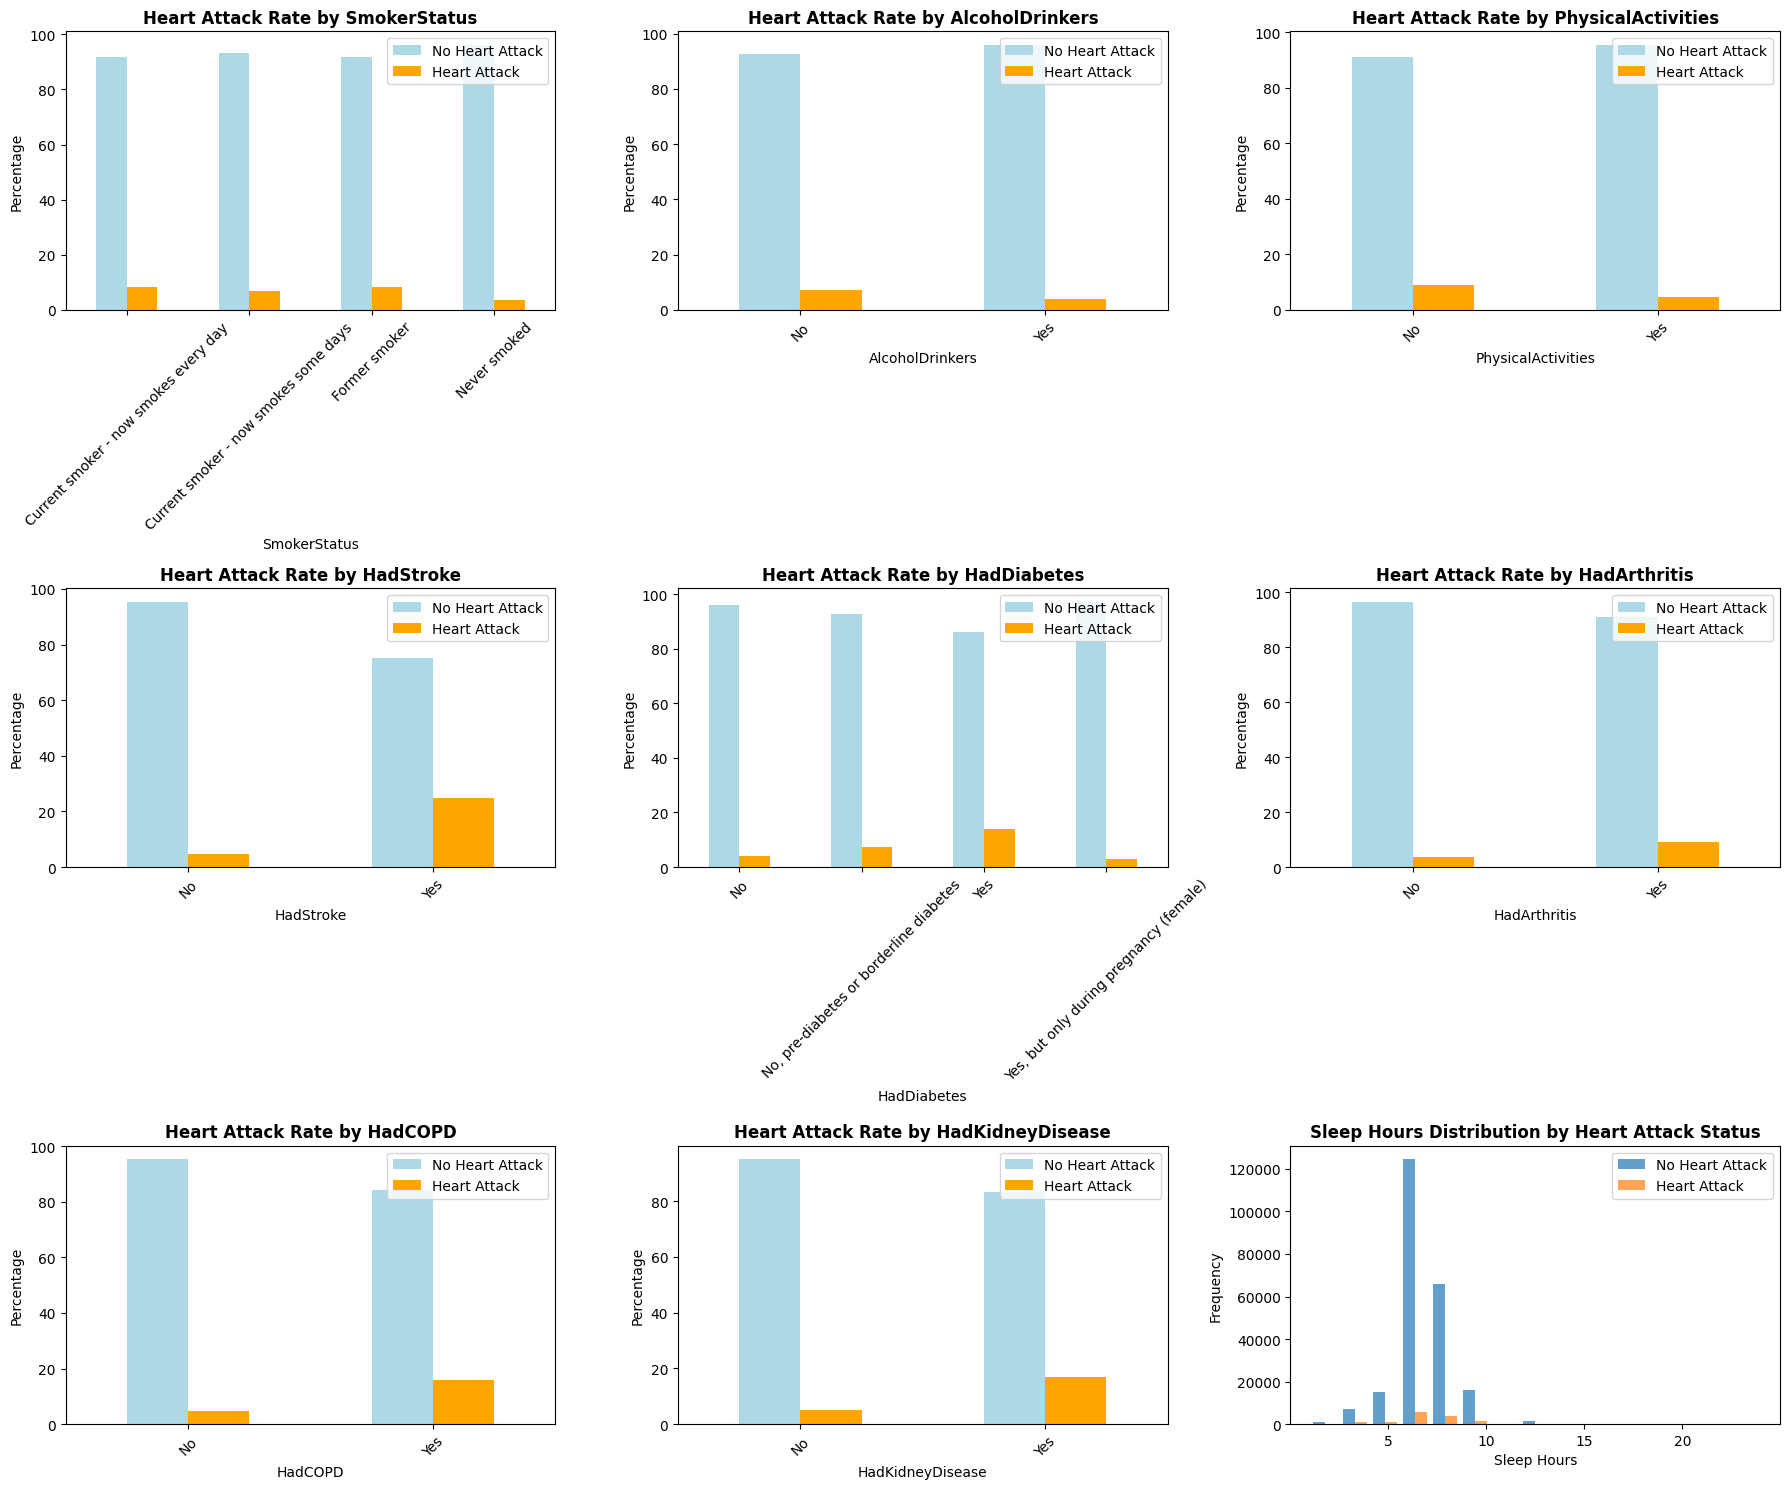

In [71]:
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.flatten()

# Lifestyle variables
lifestyle_vars = ['SmokerStatus', 'AlcoholDrinkers', 'PhysicalActivities']
for i, var in enumerate(lifestyle_vars):
    var_ha = pd.crosstab(df[var], df['HadHeartAttack'], normalize='index') * 100
    var_ha.plot(kind='bar', ax=axes[i], color=['lightblue', 'orange'])
    axes[i].set_title(f'Heart Attack Rate by {var}', fontweight='bold')
    axes[i].set_ylabel('Percentage')
    axes[i].legend(['No Heart Attack', 'Heart Attack'])
    axes[i].tick_params(axis='x', rotation=45)

# Top chronic conditions
top_chronic = ['HadStroke', 'HadDiabetes', 'HadArthritis', 'HadCOPD', 'HadKidneyDisease']
for i, condition in enumerate(top_chronic):
    if condition in df.columns:
        condition_ha = pd.crosstab(df[condition], df['HadHeartAttack'], normalize='index') * 100
        condition_ha.plot(kind='bar', ax=axes[i+3], color=['lightblue', 'orange'])
        axes[i+3].set_title(f'Heart Attack Rate by {condition}', fontweight='bold')
        axes[i+3].set_ylabel('Percentage')
        axes[i+3].legend(['No Heart Attack', 'Heart Attack'])
        axes[i+3].tick_params(axis='x', rotation=45)

# Sleep hours analysis
axes[8].hist([df[df['HadHeartAttack']=='No']['SleepHours'], 
              df[df['HadHeartAttack']=='Yes']['SleepHours']], 
             alpha=0.7, label=['No Heart Attack', 'Heart Attack'], bins=15)
axes[8].set_title('Sleep Hours Distribution by Heart Attack Status', fontweight='bold')
axes[8].set_xlabel('Sleep Hours')
axes[8].set_ylabel('Frequency')
axes[8].legend()

plt.tight_layout()
plt.show()

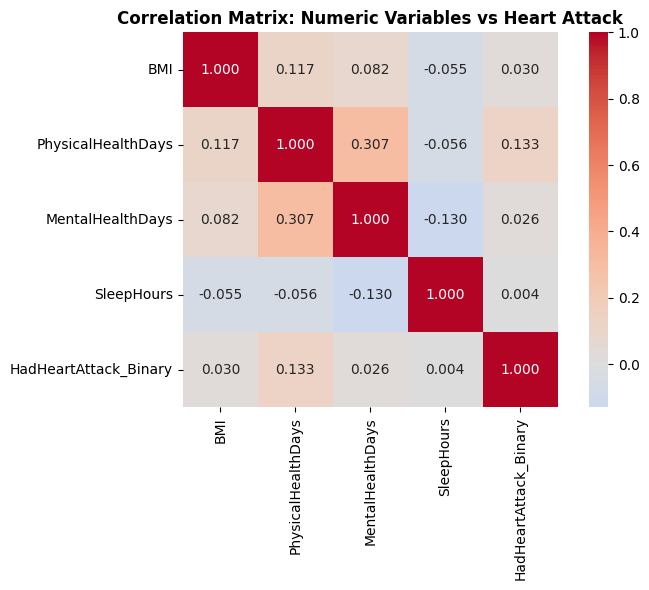

Correlation with Heart Attack:
PhysicalHealthDays    0.133420
BMI                   0.030413
MentalHealthDays      0.025892
SleepHours            0.003631
Name: HadHeartAttack_Binary, dtype: float64


In [ ]:
# Correlation analysis for numeric variables
numeric_for_corr = ['BMI', 'PhysicalHealthDays', 'MentalHealthDays', 'SleepHours']

# Create binary version of heart attack for correlation
df_corr = df.copy()
df_corr['HadHeartAttack_Binary'] = (df_corr['HadHeartAttack'] == 'Yes').astype(int)

# Correlation matrix
corr_matrix = df_corr[numeric_for_corr + ['HadHeartAttack_Binary']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.3f')
plt.title('Correlation Matrix: Numeric Variables vs Heart Attack', fontweight='bold')
plt.tight_layout()
plt.show()

print("Correlation with Heart Attack:")
correlations = corr_matrix['HadHeartAttack_Binary'].drop('HadHeartAttack_Binary').sort_values(key=abs, ascending=False)
print(correlations)